In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [2]:
tel_churn = pd.read_csv('Telecom Churn.csv')

In [3]:
tel_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
tel_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
tel_churn.dropna(inplace=True)

In [6]:
tel_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
tel_churn.drop(['customerID'],axis=1,inplace=True)

In [8]:
tel_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
tel_churn['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [10]:
tel_churn['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [11]:
tel_churn['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [12]:
tel_churn['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [13]:
tel_churn['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [14]:
tel_churn['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [15]:
tel_churn['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [16]:
tel_churn['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [17]:
tel_churn['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [18]:
tel_churn['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [19]:
tel_churn['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [20]:
tel_churn['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [21]:
tel_churn['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

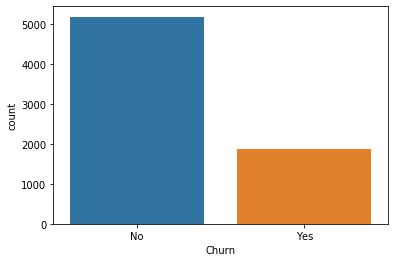

In [22]:
sns.countplot(x="Churn",data=tel_churn)

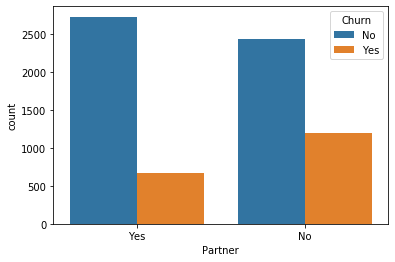

In [23]:
sns.countplot(x="Partner",data=tel_churn,hue="Churn")

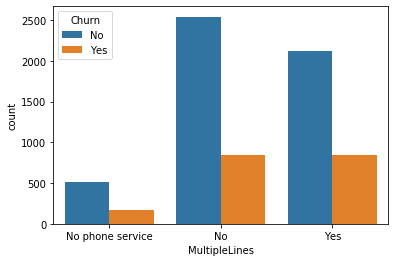

In [24]:
sns.countplot(x='MultipleLines',data=tel_churn,hue="Churn")

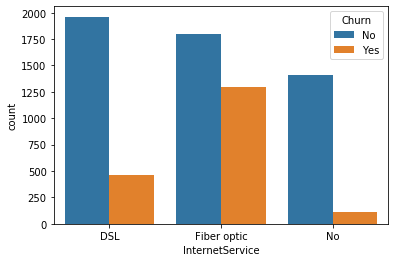

In [25]:
sns.countplot(x='InternetService',data=tel_churn,hue='Churn')

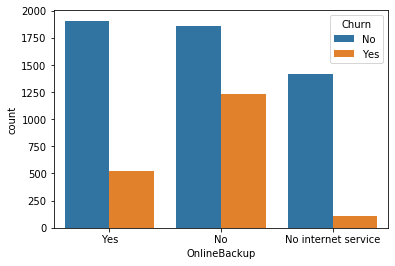

In [26]:
sns.countplot(x='OnlineBackup',data=tel_churn,hue='Churn')

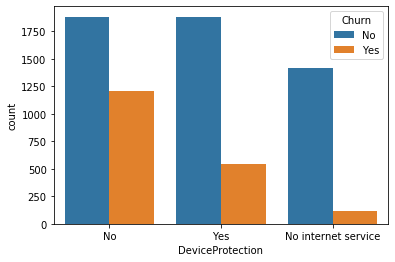

In [27]:
sns.countplot(x='DeviceProtection',data=tel_churn,hue='Churn')

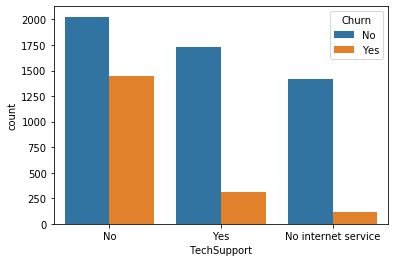

In [28]:
sns.countplot(x='TechSupport',data=tel_churn,hue='Churn')

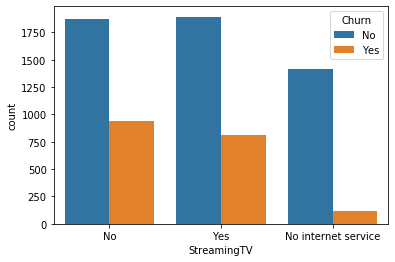

In [29]:
sns.countplot(x='StreamingTV',data=tel_churn,hue='Churn')

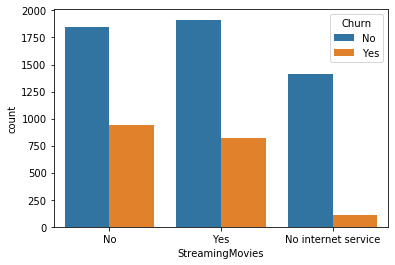

In [30]:
sns.countplot(x='StreamingMovies',data=tel_churn,hue='Churn')

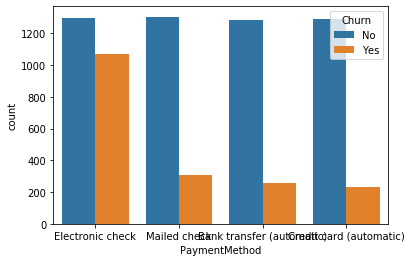

In [31]:
sns.countplot(x='PaymentMethod',data=tel_churn,hue='Churn')

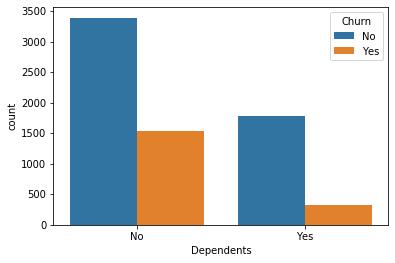

In [32]:
sns.countplot(x='Dependents',data=tel_churn,hue='Churn')

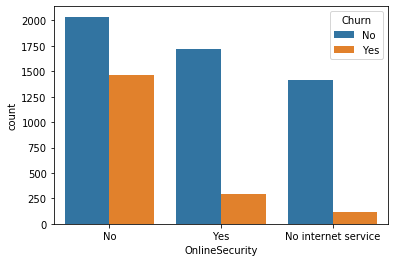

In [33]:
sns.countplot(x='OnlineSecurity',data=tel_churn,hue='Churn')

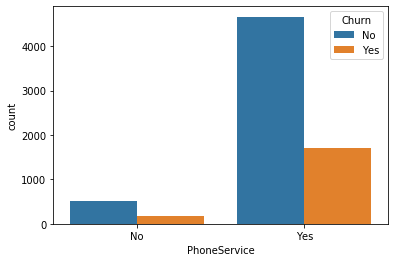

In [34]:
sns.countplot(x='PhoneService',data=tel_churn,hue='Churn')

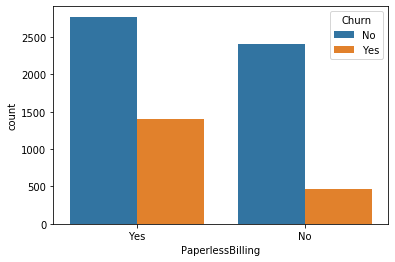

In [35]:
sns.countplot(x='PaperlessBilling',data=tel_churn,hue='Churn')

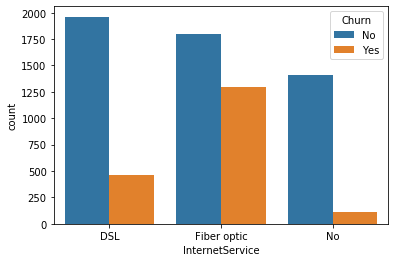

In [36]:
sns.countplot(x='InternetService',data=tel_churn,hue='Churn')

In [37]:
# no probabilty is high on all the variables

In [38]:
tel_churn.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [39]:
tel_churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [40]:
col =['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in col:
    tel_churn[i]=le.fit_transform(tel_churn[i].astype(str))

In [41]:
tel_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,28,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,12,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,40,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,12,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,17,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.5,0
7039,0,0,1,1,70,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.9,0
7040,0,0,1,1,3,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,34,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.6,1


In [42]:
tel_churn['TotalCharges'] = pd.to_numeric(tel_churn['TotalCharges'],errors='coerce')

In [43]:
tel_churn.dtypes

gender                int32
SeniorCitizen         int32
Partner               int32
Dependents            int32
tenure                int32
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

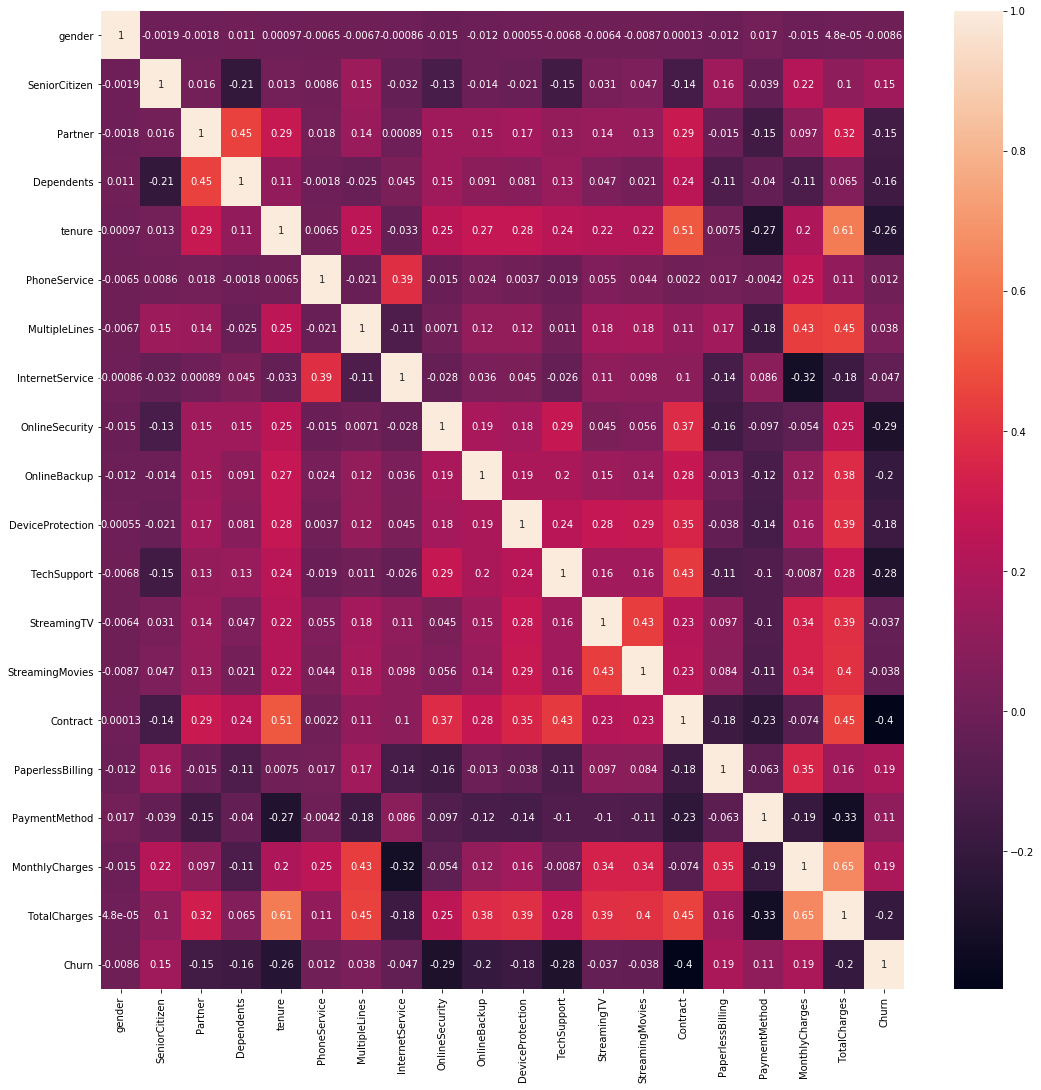

In [44]:
plt.figure(figsize=(18,18))
sns.heatmap(tel_churn.corr(),annot= True)   # not much correlaton among varaibles observed
plt.show()

In [45]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [46]:
corr_features = correlation(tel_churn,0.80) # correlation less than 80% so we can use all  the features
len(set(corr_features))

0

In [47]:
tel_churn.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [48]:
tel_churn.dropna(inplace=True)

In [49]:
x = tel_churn.drop(["Churn"],axis=1)
y = tel_churn["Churn"]
df_x = tel_churn.drop(['Churn'],axis=1)

In [50]:
x.skew()

gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.065286
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges        0.961642
dtype: float64

In [51]:
x.skew()

gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.065286
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges        0.961642
dtype: float64

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [53]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()


In [54]:
parameters = {"n_neighbors": range(1,20)}
gsc = GridSearchCV(knn,parameters,cv=5)
gsc.fit(x,y)
gsc.best_params_

{'n_neighbors': 19}

In [55]:
parameters = {"n_estimators": range(1,20)}
gsc = GridSearchCV(rfc,parameters,cv=5)
gsc.fit(x,y)
gsc.best_params_

{'n_estimators': 13}

In [56]:
knn =KNeighborsClassifier(n_neighbors=19 )
svc = SVC()
dt= DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators= 18)
gb =GaussianNB()
lg = LogisticRegression()

In [57]:
models=[]
models.append(("KNeighborsClassifier",knn))
models.append(("SVC",svc))
models.append(("DecisionTreeClassifier",dt))
models.append(("KNeighborsClassifier",knn))
models.append(("LogisticRegression",lg))
models.append(("GaussianNB",gb))
models.append(("RandomForestClassifier",rfc))


********************* KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')


Accuracy score =  0.7794054286945282


cross_val_score=  0.7831321527867581


roc_auc_score =  0.658389782602447


Classification_Report
               precision    recall  f1-score   support

           0       0.81      0.91      0.86      1711
           1       0.62      0.40      0.49       610

    accuracy                           0.78      2321
   macro avg       0.72      0.66      0.67      2321
weighted avg       0.76      0.78      0.76      2321



[[1563  148]
 [ 364  246]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



********************* SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf'

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Accuracy score =  0.7225333907798362


cross_val_score=  0.7248361324841588


roc_auc_score =  0.6540997978365638


Classification_Report
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1711
           1       0.47      0.51      0.49       610

    accuracy                           0.72      2321
   macro avg       0.65      0.65      0.65      2321
weighted avg       0.73      0.72      0.73      2321



[[1366  345]
 [ 299  311]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



********************* KNeigh

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy score =  0.7931925894011203




C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

cross_val_score=  0.7926629380576748


roc_auc_score =  0.7094092228684213


Classification_Report
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1711
           1       0.62      0.53      0.58       610

    accuracy                           0.79      2321
   macro avg       0.73      0.71      0.72      2321
weighted avg       0.78      0.79      0.79      2321



[[1516  195]
 [ 285  325]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



********************* GaussianNB ***********************


GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy score =  0.7419215855234813


cross_val_score=  0.7509949243501874


roc_auc_score =  0.7384551264240067


Classification_Report
               precision    recall  f1-score   support

           0       0.89      0.75      0.81      1711
           1       0.51      0.73      0.60       610

    accuracy                           0.74      2321
   macro avg       0.70      0.74

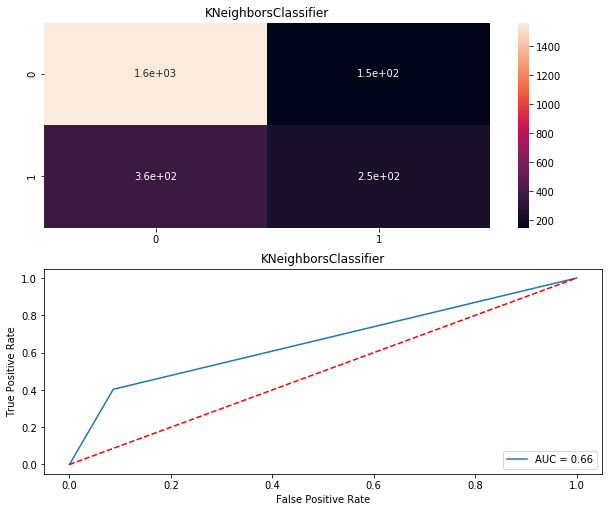

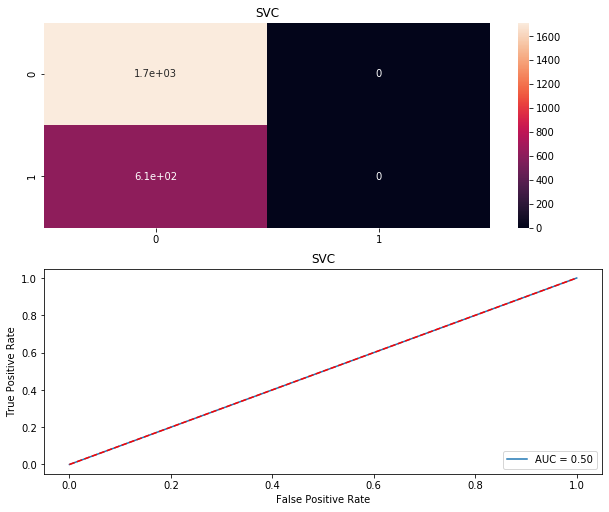

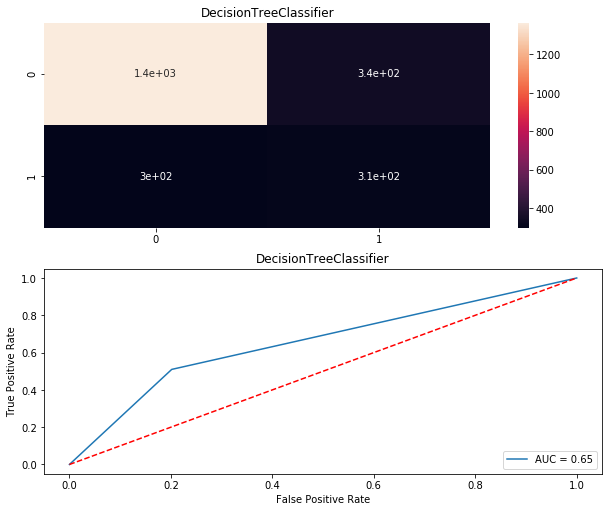

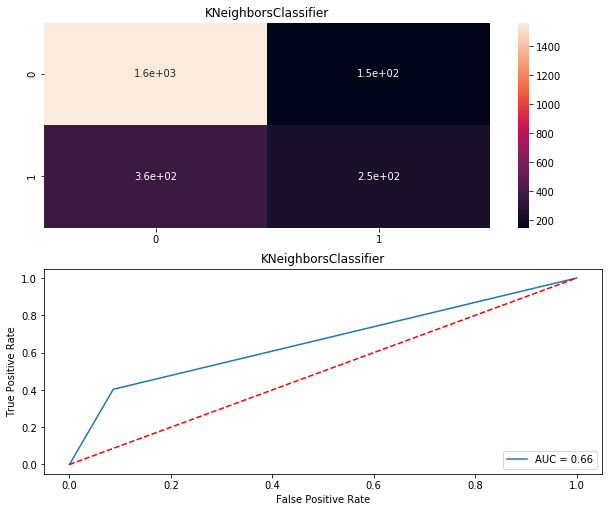

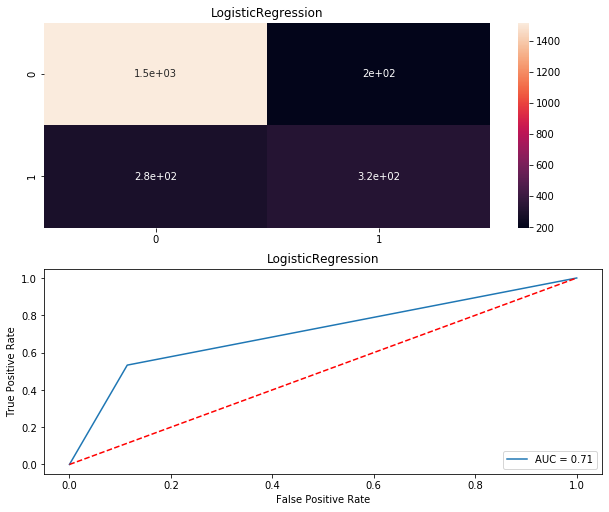

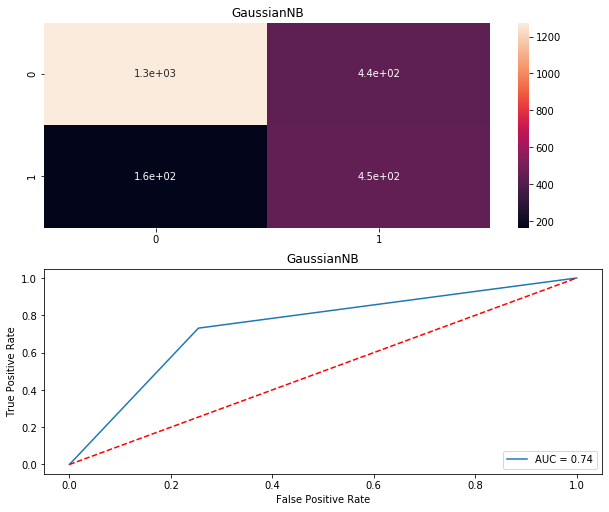

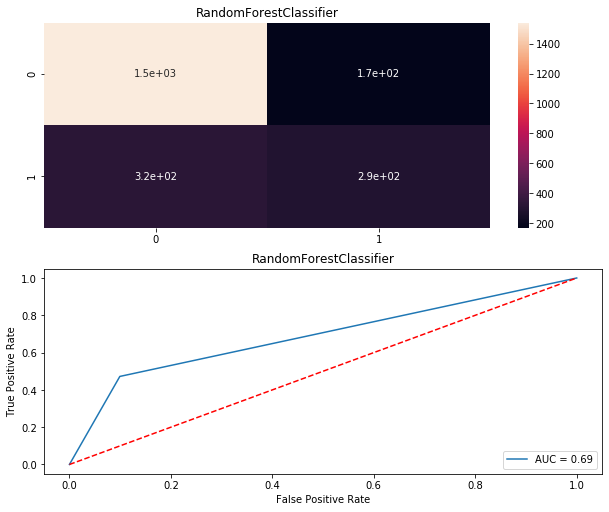

In [58]:
Model =[]
score =[]
cvs=[]
rocscore=[]
for name,model in models:
    print('*********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS = accuracy_score(y_test,pre)
    print("Accuracy score = ",AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model,x,y,cv=10,scoring="accuracy").mean()
    print("cross_val_score= ",sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    print("roc_auc_score = ",roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print("Classification_Report\n",classification_report(y_test,pre))
    print('\n')
    cm = confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot = True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label = "AUC = %0.2f"%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc="lower right")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [59]:
result = pd.DataFrame({"Model": Model,"Accuracy Score":score,"Cross_val_score":cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy Score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,77.940543,78.313215,65.838978
1,SVC,73.718225,73.421497,50.000000
2,DecisionTreeClassifier,72.253339,72.483613,65.409980
3,KNeighborsClassifier,77.940543,78.313215,65.838978
4,LogisticRegression,79.319259,79.266294,70.940922
5,GaussianNB,74.192159,75.099492,73.845513
6,RandomForestClassifier,78.802240,78.540730,68.638702


In [60]:
from sklearn.externals import joblib
joblib.dump(rfc,"Customer Churn1.obj")

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['Customer Churn1.obj']

In [61]:
model=joblib.load('Customer Churn1.obj')

In [62]:
model.predict(x_test)

array([0, 0, 1, ..., 0, 0, 1])